# Gapped k-mer Support Vector Machine (gkSVM) Intepretation

**Authorship:**
Adam Klie, *09/26/2021*
***
**Description:**
Notebook for the interpretation of gkSVM model predictions based on gkmexplain
***
**TODOs:**
 - <font color='green'> Done TODO </font>
 - <font color='orange'> WIP TODO </font>
 - <font color='red'> Queued TODO </font>
***

In [4]:
# Classics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Loading webpages
from scipy import stats
from IPython.display import IFrame
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Define parameters of the notebook

In [5]:
# Define params for dataset loading
ACTIVE_LOW = 0.09  # The activity below which to define inactive enhancers
ACTIVE_HIGH = 0.4  # The activity above which to define active enhancers
PREPROCESS = "{}-{}".format(ACTIVE_LOW, ACTIVE_HIGH)  # String defining the preprocessing for saving
FEATURES = "fasta"  # What features to use to train the model
LABELS = "binary"
HYPERPARAM = "final-selected"
OUTDIR = "../gkSVM/Result_{0}_{1}_gkSVM-clf_{2}".format(PREPROCESS, FEATURES, HYPERPARAM)

# Load data

In [7]:
dataset = "2021_OLS_Exact_Syntax_Match"

In [ ]:
dataframe_f = "../data/{}/{}.tsv".format(dataset)
scores_f = os.path.join(OUTDIR, "{}.predict.txt".format(dataset))
explain_f = 

In [ ]:
print("Loading\n \
    \tdataframe:{} \
    \tscores:{} \
    \texplanations:{}

In [6]:
test_dataframe = pd.read_csv(, sep="\t")
test_dataframe.head()

,NAME,SEQ,FXN_LABEL,FXN_DESCRIPTION,TILE,SEQ_LEN
0,EM.Ci1,CCTATCTTAGATATTGAACAATTTCCTTTTCGAAAACTTCCGTTAG...,1,WT Control,Full,53
1,EM.Dr1,TTTTCCAGTTGCGATATTTTTGGTATTTATCTTCAGGAAATCACTA...,1,b-lineage only,Full,61
2,EM.Ggd1,CAGATATGGTACCTTGCGATATTATAGTCAGGAAGCATGGAAAGAA...,0,No expr,Full,53
3,EM.Mm6,AATATCTGTTTATCACCAAAGGAAGTCAAGACAGGAACTATGCAGA...,0,No expr,Full,58
4,EM.Hs9,CATATCTACAAAGGAAGTAACCATACGATAGTATAAAATGATAGAA...,0,No expr,Full,65


In [ ]:
test_score_file = 

In [585]:
# Load dataframe
test2_dataset = pd.read_csv("../data/2021_GATA_ETS_clusters/GATA_ETS_clusters_tiled.tsv", sep="\t")
#test2_dataset = pd.read_excel("../data/2021_GATA_ETS_clusters/GATA_ETS_clusters.xlsx", sheet_name=0).dropna()
test2_dataset = test2_dataset.set_index(["Name", "Type"])

# Load scores
test2_score_file = os.path.join(OUTDIR, "2021_GATA_ETS_tiled.predict.txt")
test2_scores = pd.read_csv(test2_score_file, delim_whitespace=True, header=None, names=["NAME", "gkSVM_score"])
test2_scores[["NAME", "Type"]] = test2_scores["NAME"].str.split(":").tolist()
test2_scores = test2_scores.set_index(["NAME", "Type"])

# Add preds
test2_scores["gkSVM_preds"] = (test2_scores["gkSVM_score"] >= 0).astype(int)

# Make df
test2_df = pd.concat([test2_dataset, test2_scores], axis=1)
test2_df["sequence_len"] = test2_df["Sequence"].apply(len)
test2_df["{}_classification".format(MODEL)] = ["-".join(list(value)) for value in test2_df[["label", "{}_preds".format(MODEL)]].values.astype(str)]
test2_df["{}_classification".format(MODEL)] = test2_df["{}_classification".format(MODEL)].replace({"0-0": "TN", "1-0": "FN", "0-1": "FP", "1-1": "TP"})
test2_df = test2_df.reset_index()
test2_df["{}_classification".format(MODEL)].value_counts()

FP    98
FN    70
TN    45
TP    45
Name: gkSVM_classification, dtype: int64

In [4]:
y = np.loadtxt('../data/{0}_Library/y_binary_{1}.txt'.format(DATASET.replace("-", "_"), PREPROCESS), dtype=int)
IDs = np.loadtxt('../data/{0}_Library/sequence_id_{1}.txt'.format(DATASET.replace("-", "_"), PREPROCESS), dtype=str)
dataframe = pd.read_csv("../data/{0}_Library/20210728-3.EnhancerTable.ForAdam.FunctionalEnhancers.WT-detected.ABL-notDetected.10R-20U-0.1P.tsv".format(DATASET.replace("-", "_")), sep="\t", na_values="na")
IDs[0], y[0], IDs.shape, y.shape

('S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6', 1, (302936,), (302936,))

In [5]:
dataframe = dataframe[~dataframe["MPRA_FXN"].isna()].set_index("NAME")
dataframe.head(1)

,SEQUENCE,MPRA_FXN,MICROSCOPE_FXN,ACTIVITY_SUMRNA_NUMDNA
NAME,,,,
S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATT...,1.0,Neural Enhancer,0.611767


In [6]:
# Make sure ordering is correct
pos_tr_scores = pd.read_csv('Result_{0}-X-fasta_{1}_{2}/{0}-X-fasta_{1}_{2}.tr.predict.txt'.format(DATASET, PREPROCESS, HYPERPARAM), delim_whitespace=True, header=None, names=["NAME", "probability"])
neg_tr_scores = pd.read_csv('Result_{0}-X-fasta_{1}_{2}/{0}-X-fasta_{1}_{2}.neg.tr.predict.txt'.format(DATASET, PREPROCESS, HYPERPARAM), delim_whitespace=True, header=None, names=["NAME", "probability"])
pos_scores = pd.read_csv('Result_{0}-X-fasta_{1}_{2}/{0}-X-fasta_{1}_{2}.predict.txt'.format(DATASET, PREPROCESS, HYPERPARAM), delim_whitespace=True, header=None, names=["NAME", "probability"])
neg_scores = pd.read_csv('Result_{0}-X-fasta_{1}_{2}/{0}-X-fasta_{1}_{2}.neg.predict.txt'.format(DATASET, PREPROCESS, HYPERPARAM), delim_whitespace=True, header=None, names=["NAME", "probability"])

In [7]:
len(pos_tr_scores), len(neg_tr_scores), len(pos_scores), len(neg_scores)

(84851, 187791, 9356, 20938)

In [8]:
pos_scores["labels"] = 1
pos_tr_scores["labels"] = 1
neg_scores["labels"] = 0
neg_tr_scores["labels"] = 0

In [9]:
pos_scores["preds"] = (pos_scores["probability"] >= 0).astype(int)
pos_tr_scores["preds"] = (pos_tr_scores["probability"] >= 0).astype(int)
neg_scores["preds"] = (neg_scores["probability"] >= 0).astype(int)
neg_tr_scores["preds"] = (neg_tr_scores["probability"] >= 0).astype(int)

In [10]:
clf_train_df = pd.concat([pos_tr_scores, neg_tr_scores]).set_index("NAME")
train_df = pd.merge(dataframe, clf_train_df, left_index=True, right_index=True)
(train_df["labels"] == train_df["MPRA_FXN"]).all()
train_df["classification"] = ["-".join(list(value)) for value in train_df[["labels", "preds"]].values.astype(str)]
train_df["classification"] = train_df["classification"].replace({"0-0": "TN", "1-0": "FN", "0-1": "FP", "1-1": "TP"})
train_df["classification"].value_counts()
train_df["ACTIVITY_SUMRNA_NUMDNA"].replace(np.inf, np.nan, inplace=True)
train_df = train_df[np.abs(stats.zscore(train_df["ACTIVITY_SUMRNA_NUMDNA"], nan_policy="omit")) < 3]

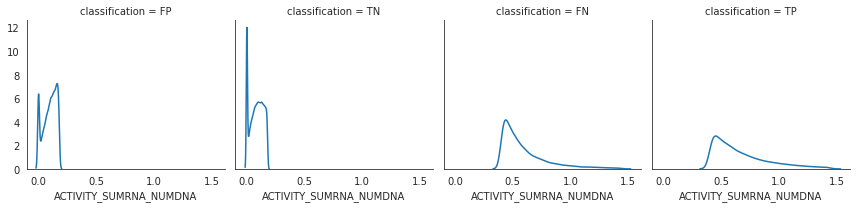

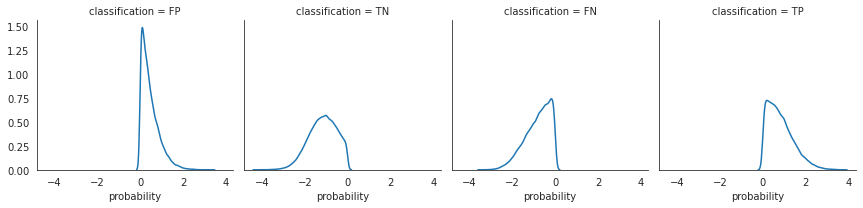

In [11]:
sns.set_style("white")
g = sns.FacetGrid(train_df, col="classification", col_order=["FP", "TN", "FN", "TP"])
g.map(sns.kdeplot, "ACTIVITY_SUMRNA_NUMDNA")
g2 = sns.FacetGrid(train_df, col="classification", col_order=["FP", "TN", "FN", "TP"])
g2.map(sns.kdeplot, "probability")

In [12]:
clf_test_df = pd.concat([pos_scores, neg_scores]).set_index("NAME")
test_df = pd.merge(dataframe, clf_test_df, left_index=True, right_index=True)
test_df["classification"] = ["-".join(list(value)) for value in test_df[["labels", "preds"]].values.astype(str)]
test_df["classification"] = test_df["classification"].replace({"0-0": "TN", "1-0": "FN", "0-1": "FP", "1-1": "TP"})
test_df["classification"].value_counts()
test_df["ACTIVITY_SUMRNA_NUMDNA"].replace(np.inf, np.nan, inplace=True)
test_df = test_df[np.abs(stats.zscore(test_df["ACTIVITY_SUMRNA_NUMDNA"], nan_policy="omit")) < 3]

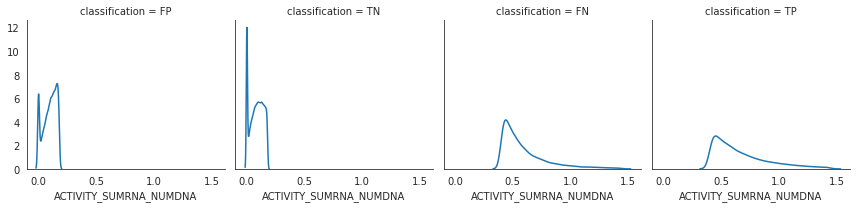

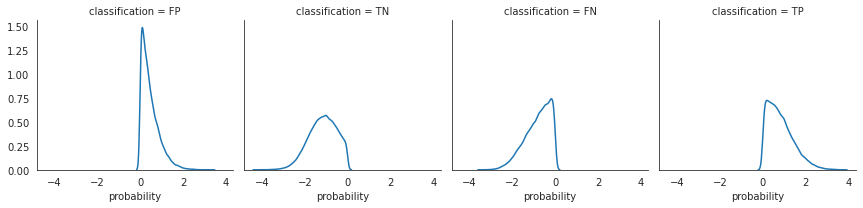

In [13]:
sns.set_style("white")
g = sns.FacetGrid(train_df, col="classification", col_order=["FP", "TN", "FN", "TP"])
g.map(sns.kdeplot, "ACTIVITY_SUMRNA_NUMDNA")
g2 = sns.FacetGrid(train_df, col="classification", col_order=["FP", "TN", "FN", "TP"])
g2.map(sns.kdeplot, "probability")

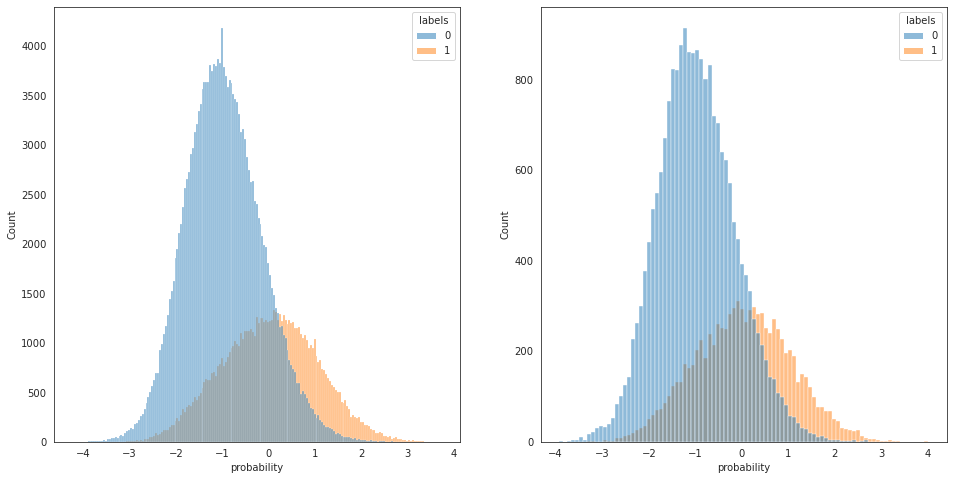

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
sns.histplot(data=train_df, x="probability", hue="labels", ax=ax[0])
sns.histplot(data=test_df, x="probability", hue="labels", ax=ax[1]);

In [15]:
(test_df["labels"] == 1).sum()

8958

## Feature Importance Anaysis

In [21]:
#PRELIMINARY

In [4]:
tmp_file = "/cellar/users/aklie/projects/EUGENE/gkSVM/Result_0.18-0.4_fasta_gkSVM-clf_meeting-selected/0.18-0.4_fasta_gkSVM-clf_meeting-selected.microscope.explanations.txt"

In [5]:
impscores = [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open(tmp_file)
]

In [6]:
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
#read in the fasta files and one-hot encode
fasta_seqs = [x.rstrip() for (i,x) in enumerate(open("../data/2021_OLS_Library/fasta/X_fasta_0.18-0.4.test.fa"))
              if i%2==1]
onehot_data = np.array([one_hot_encode_along_channel_axis(x)
                         for x in fasta_seqs])

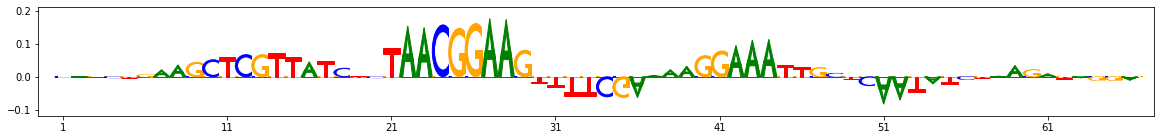

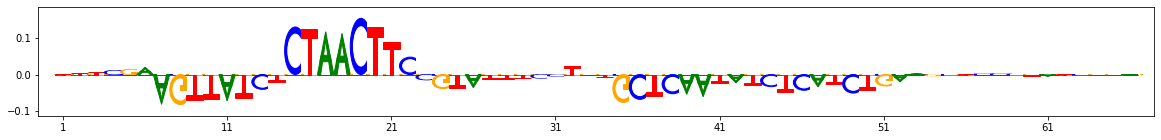

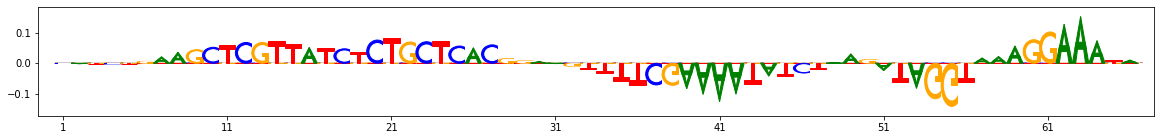

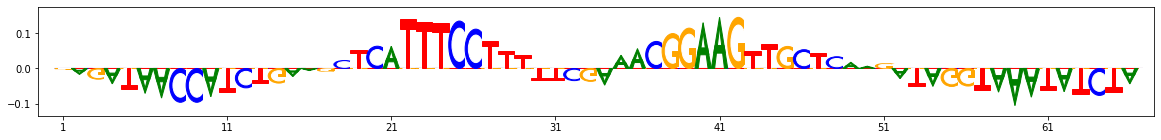

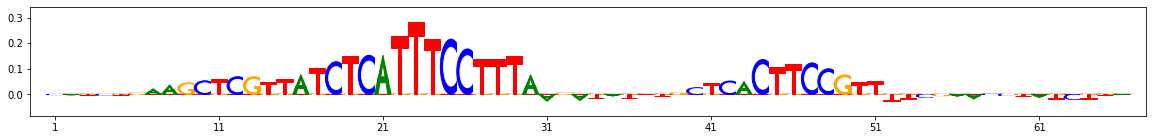

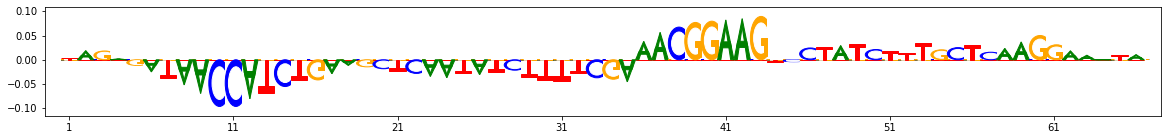

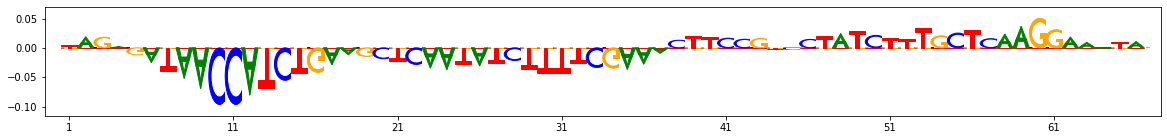

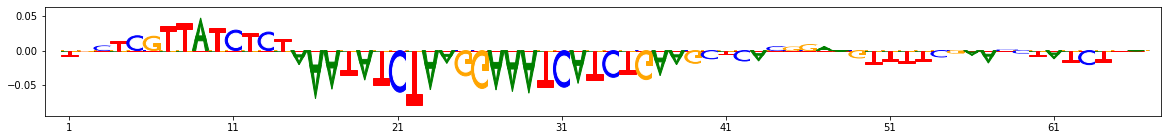

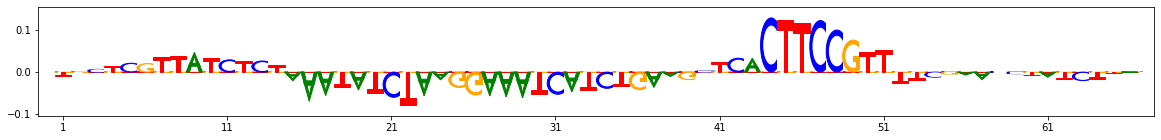

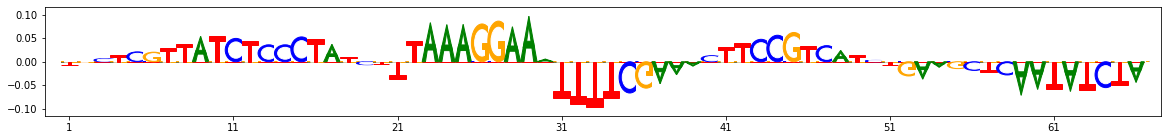

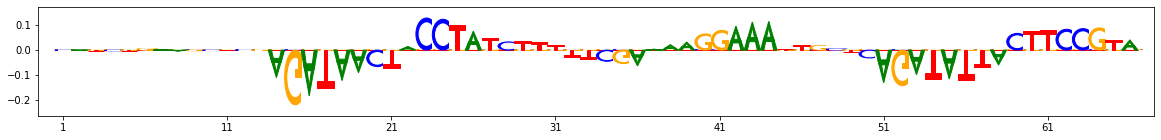

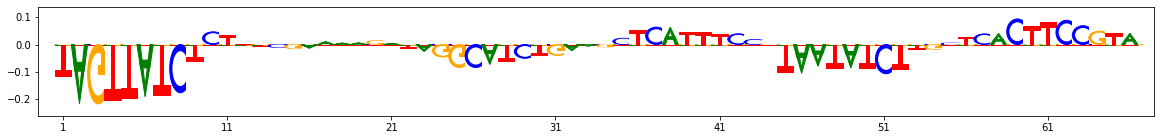

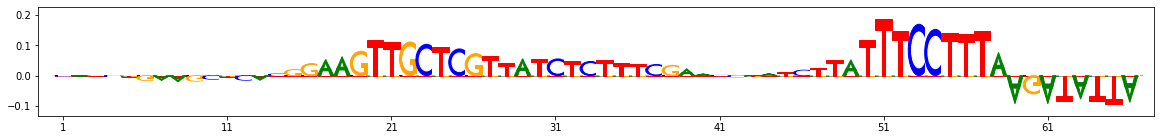

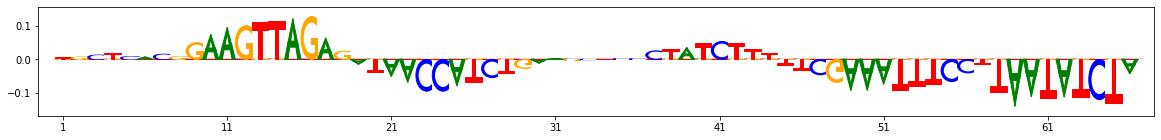

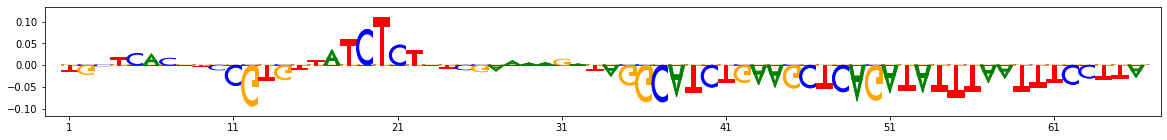

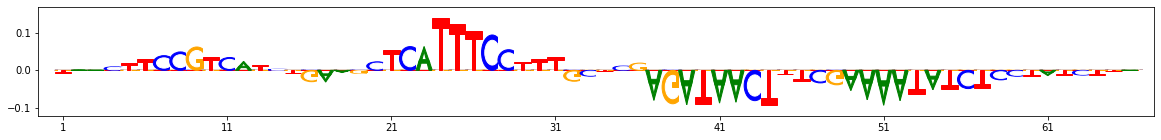

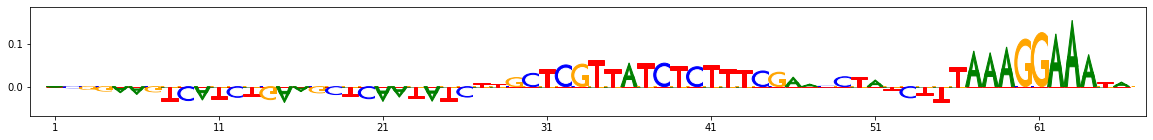

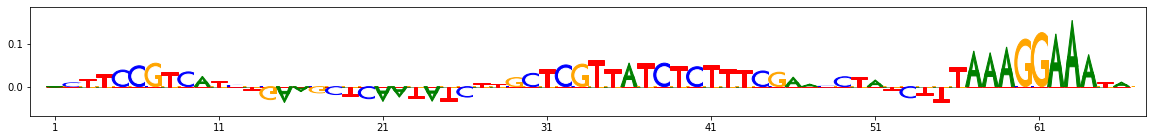

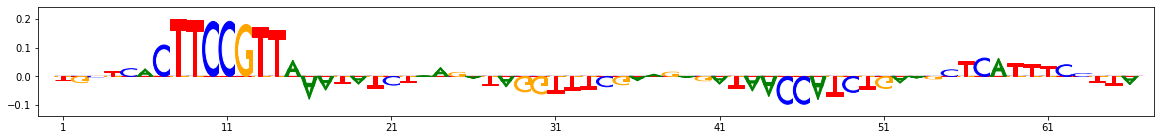

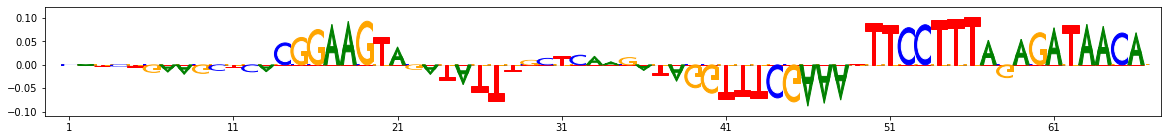

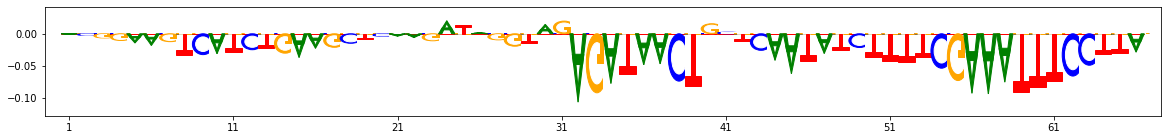

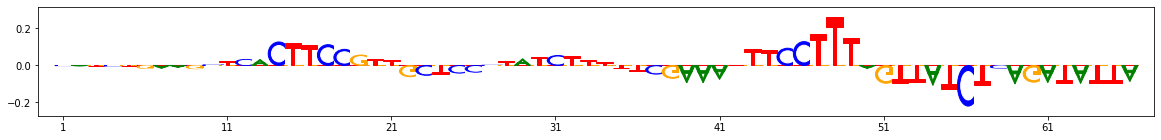

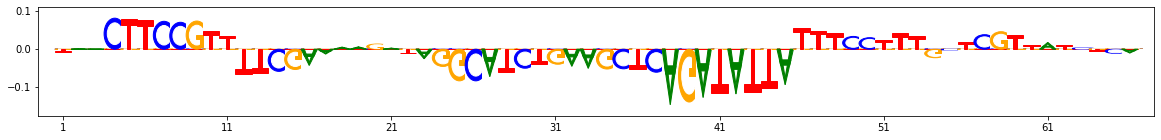

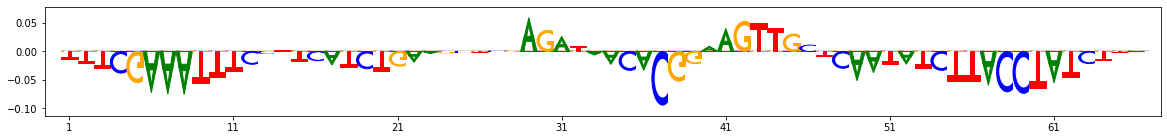

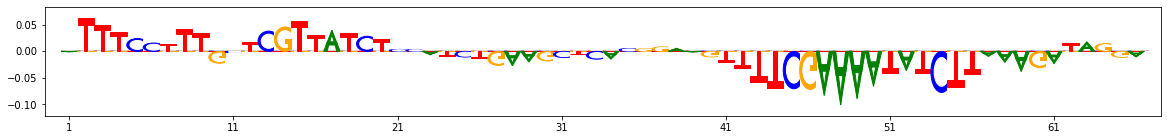

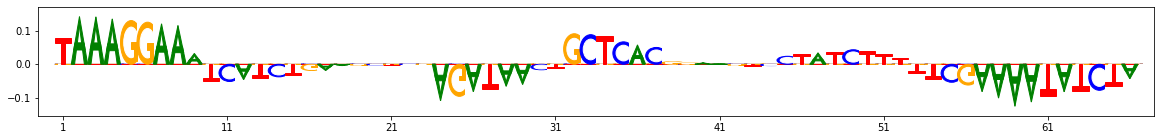

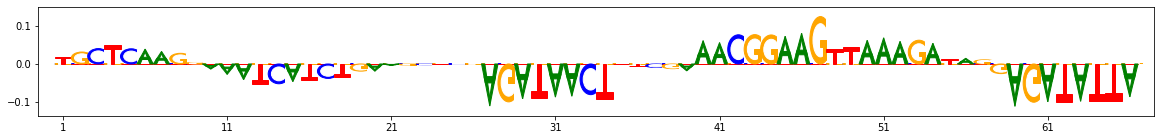

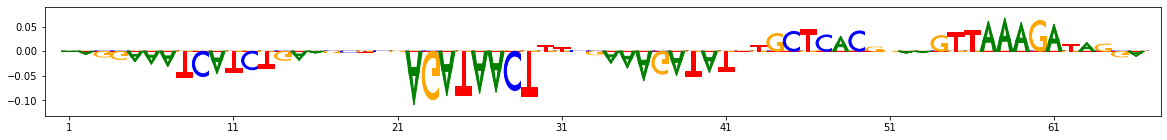

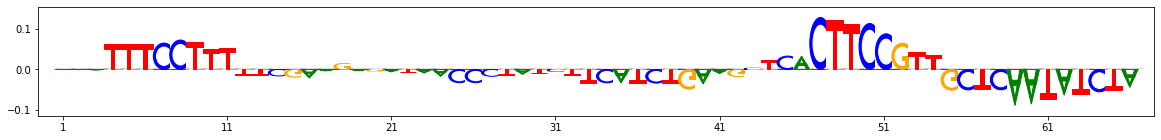

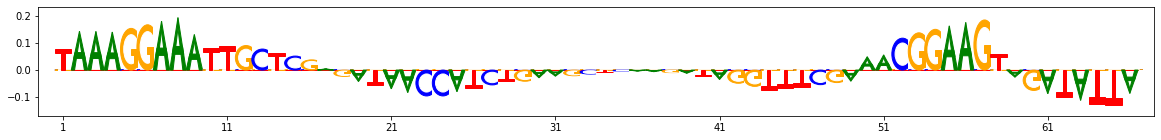

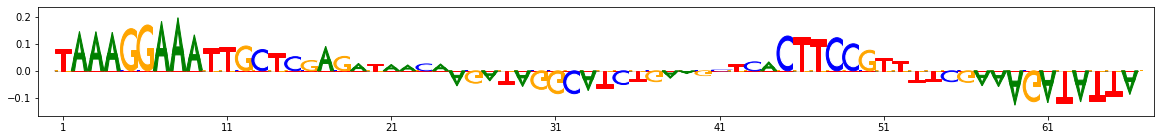

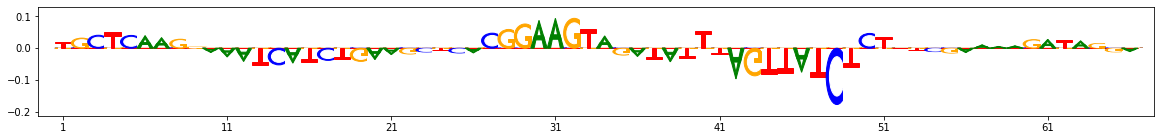

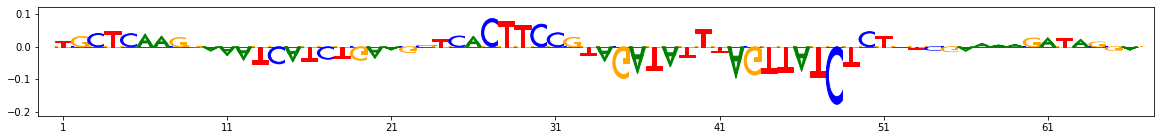

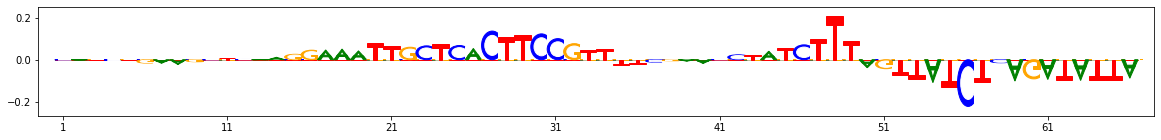

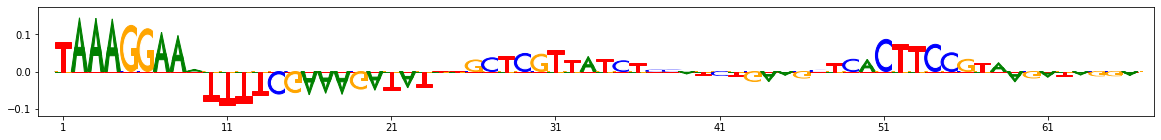

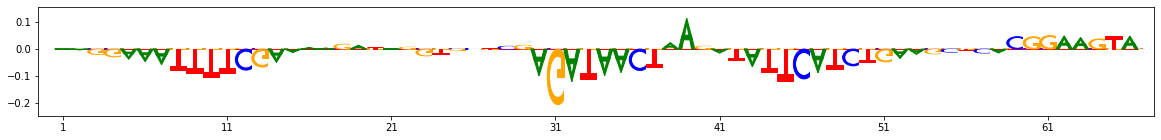

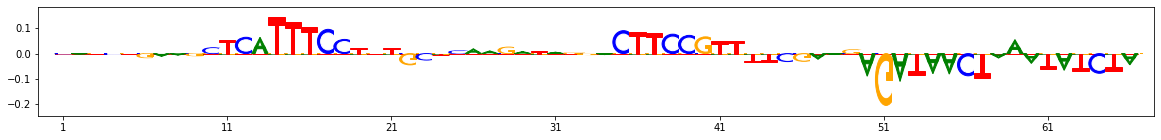

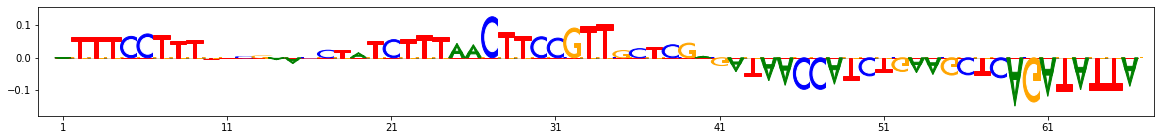

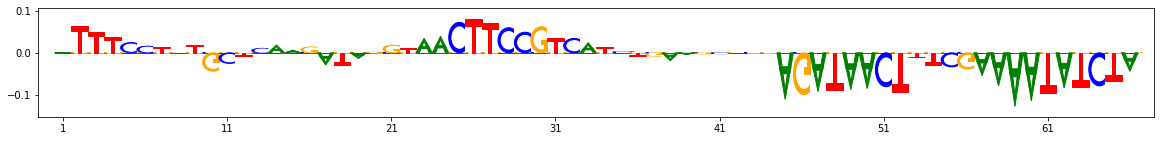

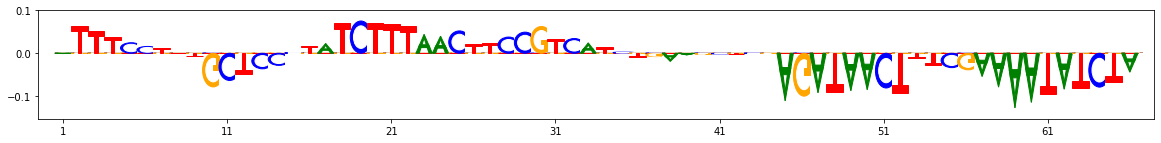

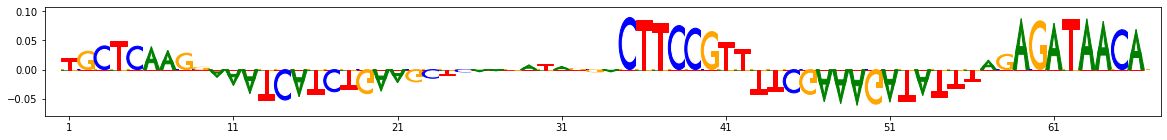

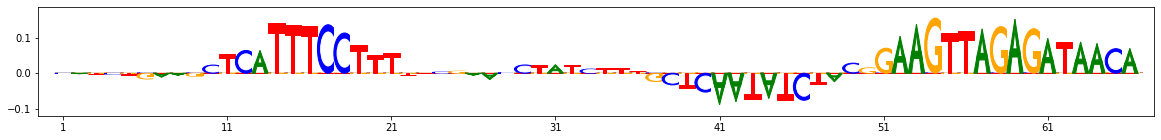

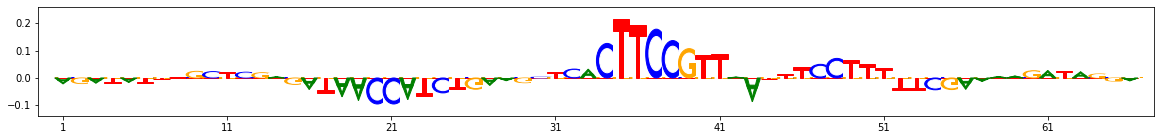

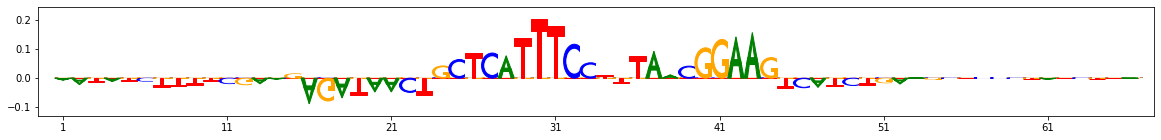

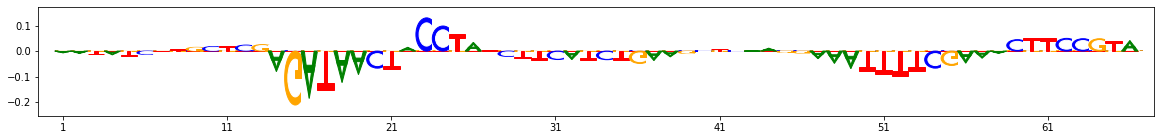

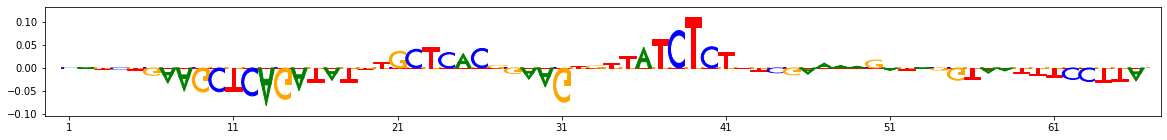

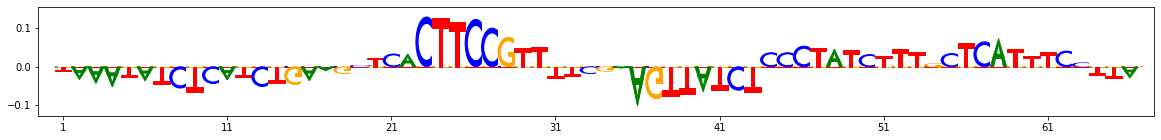

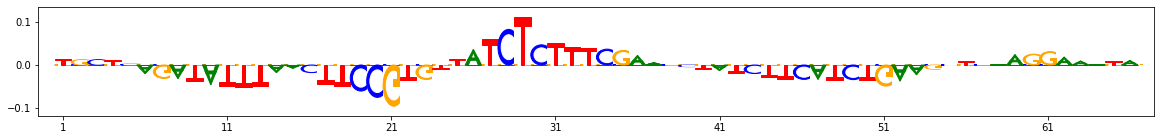

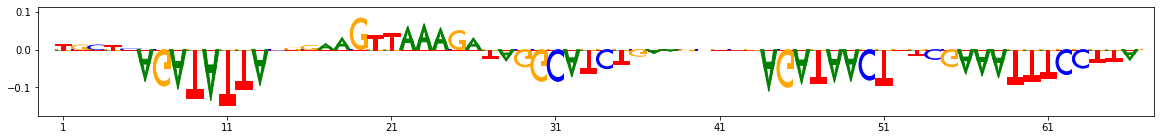

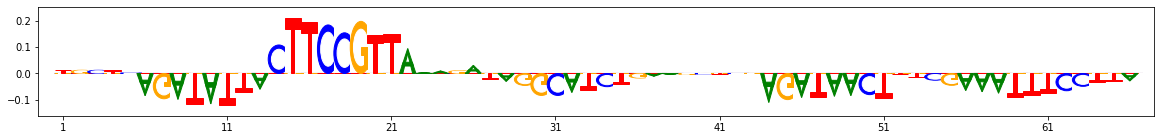

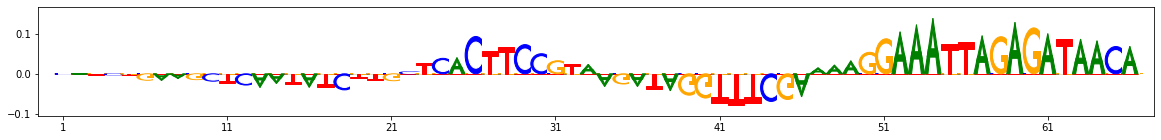

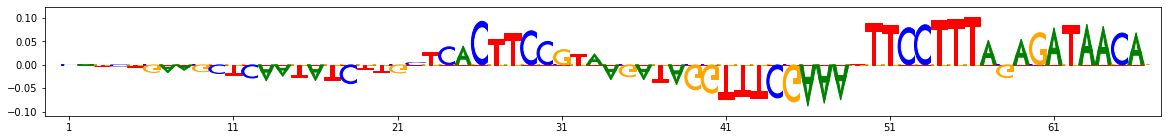

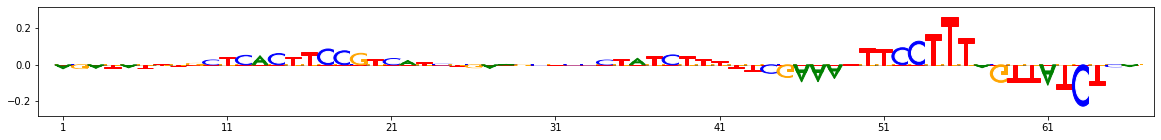

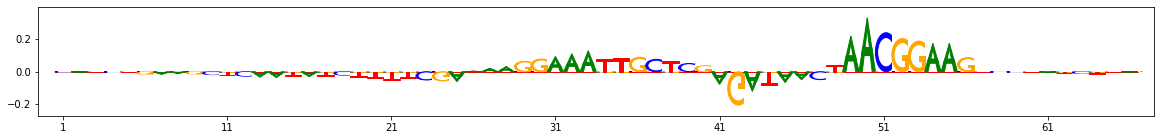

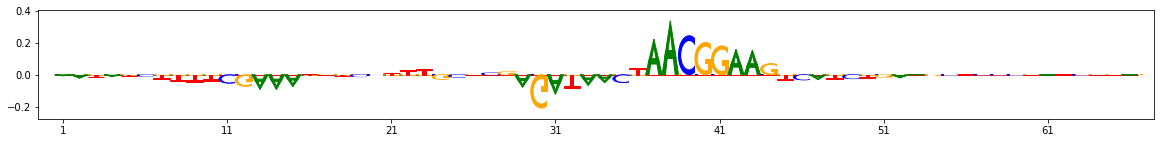

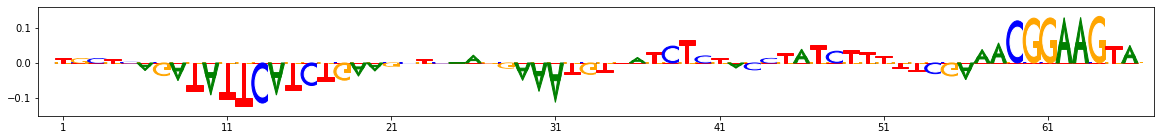

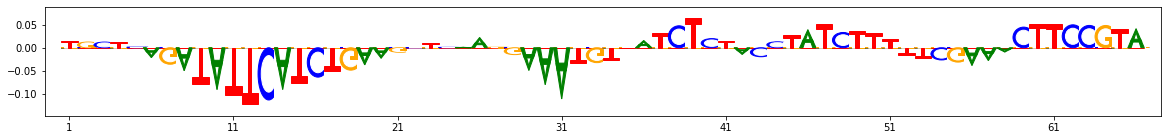

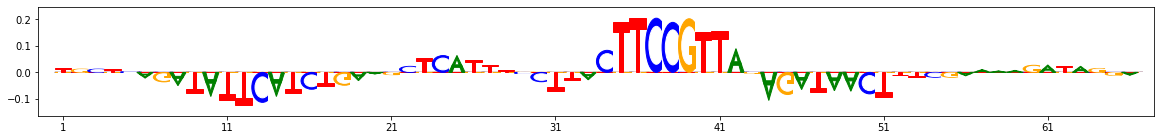

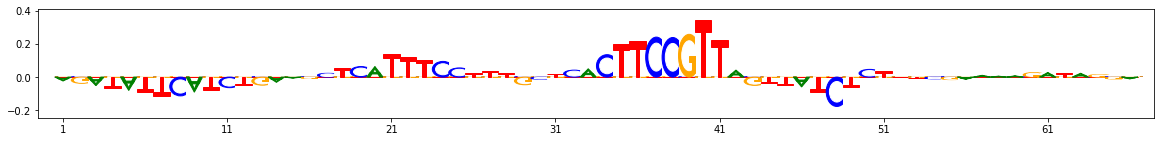

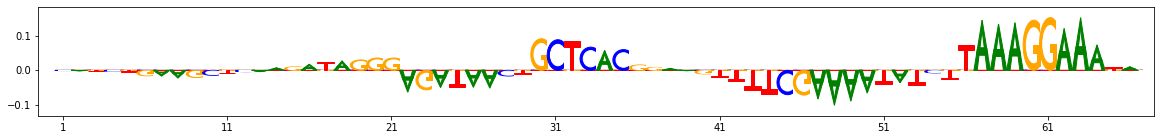

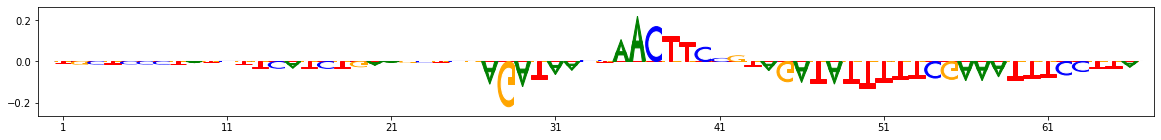

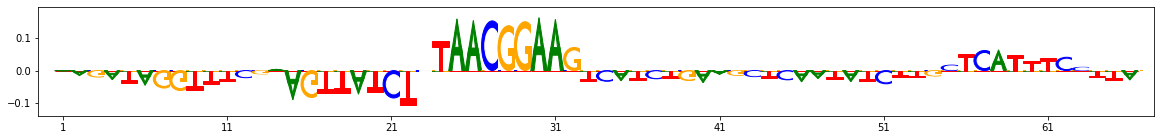

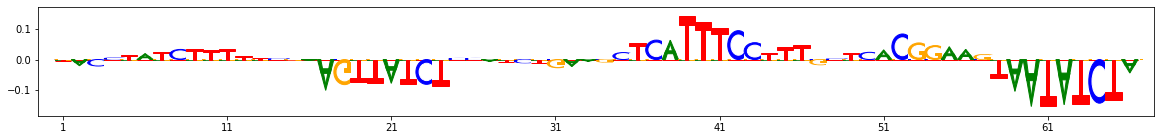

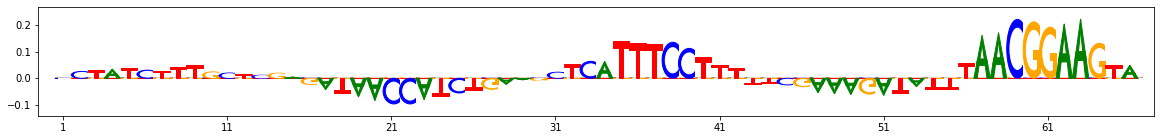

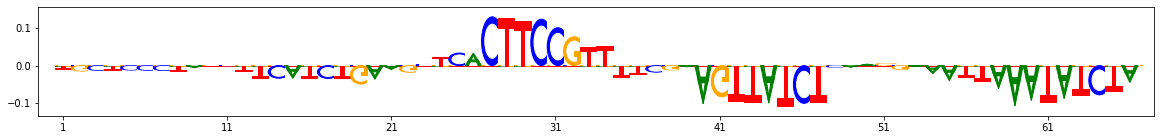

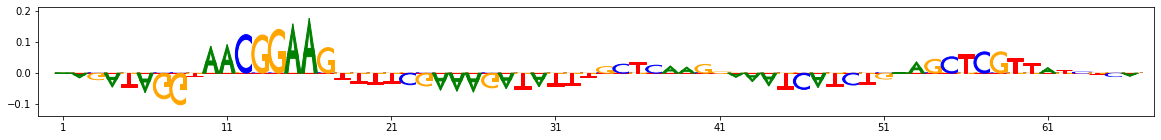

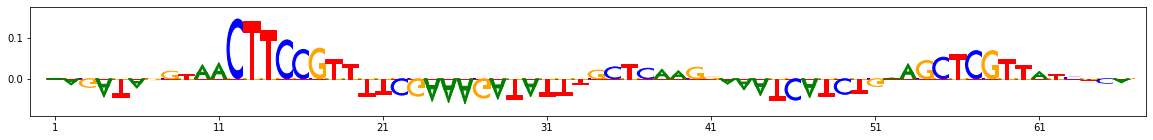

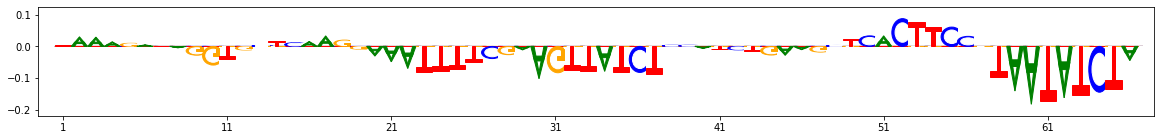

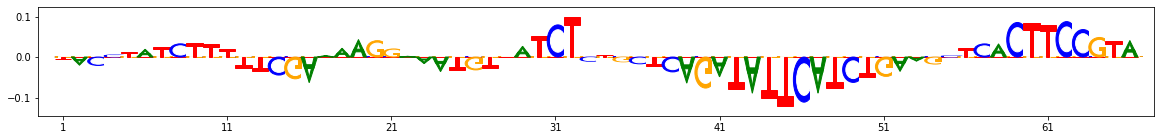

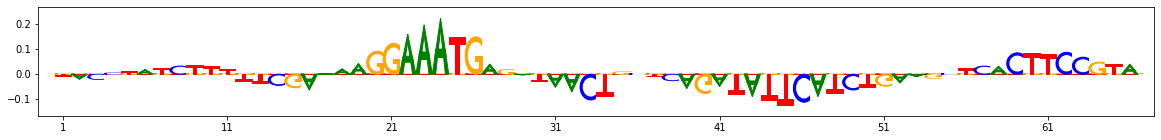

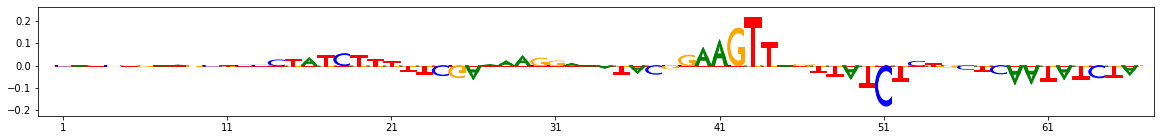

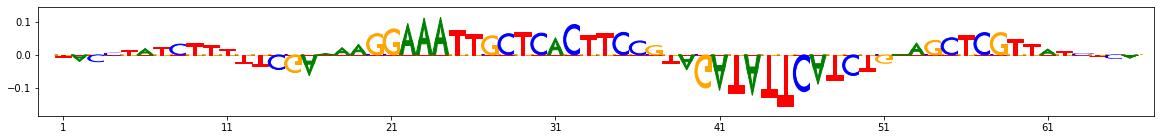

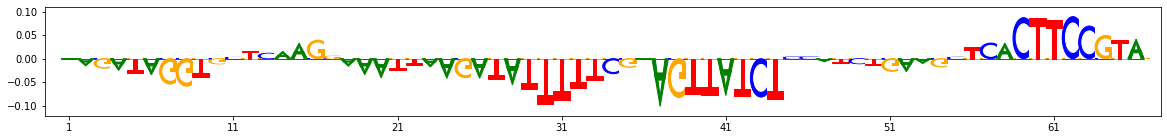

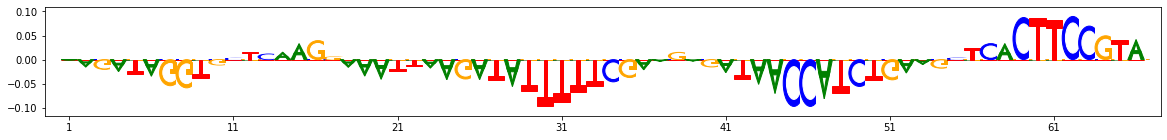

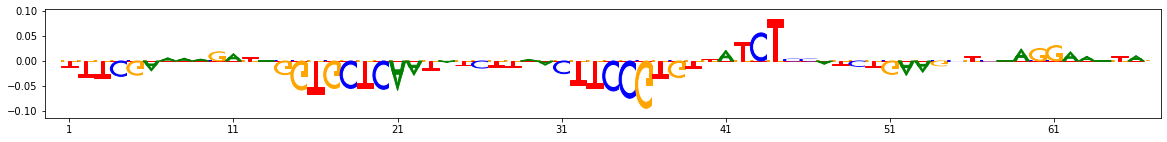

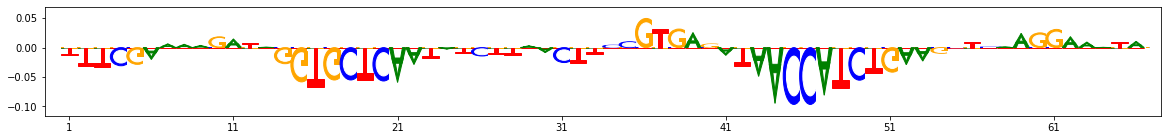

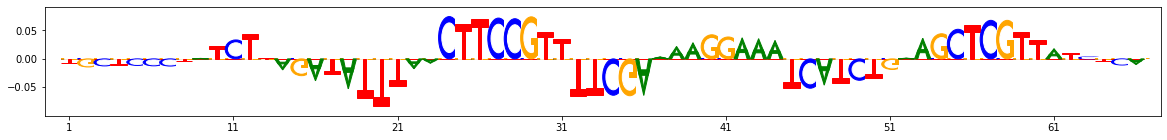

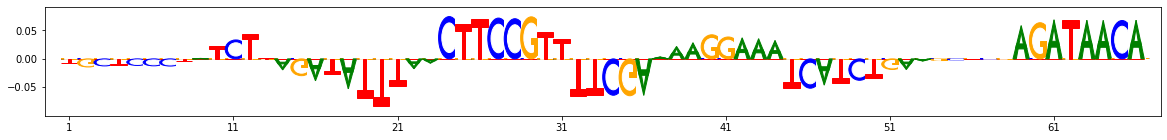

In [8]:
import vizsequence
from vizsequence import viz_sequence
for i in range(len(impscores)):
    viz_sequence.plot_weights(impscores[i], subticks_frequency=10)
  
  
    #normalize the hyp scores such that, at each position, hypothetical importance
    # scores that have the same sign as the original importance score all sum
    # up to the original importance score value. The rationale is that if
    # a different base at the same position could produce a score of higher
    # magnitude than the base that is actually present, then the base
    # that is actually present is relatively less important.
    #Empirically, hypothetical scores like these appear to work better for
    # motif discovery.
    imp_score_each_pos = np.sum(impscores[i],axis=-1)
    imp_score_sign_each_pos = np.sign(imp_score_each_pos)